# Brief introduction to Machine Learning (ML)
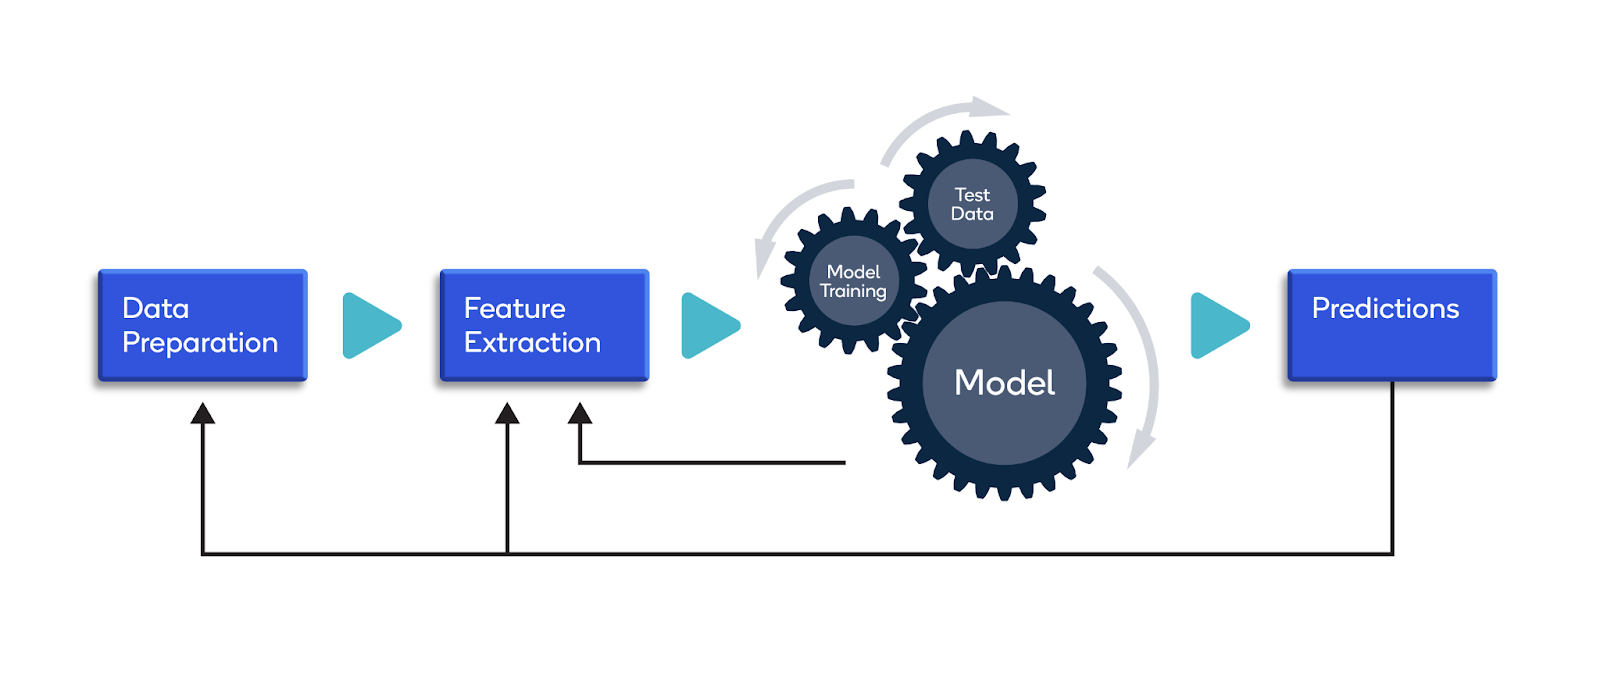

source link (https://developer.qualcomm.com/sites/default/files/attachments/learning_resources_01-01.png)

## Does ML work?

#source link (https://i.ytimg.com/vi/gAb07ZiojN0/hqdefault.jpg)

## Supervised Learning
 - ### Regression
 - ### Classification
## Unsupervised Learning
 - ### Clustering
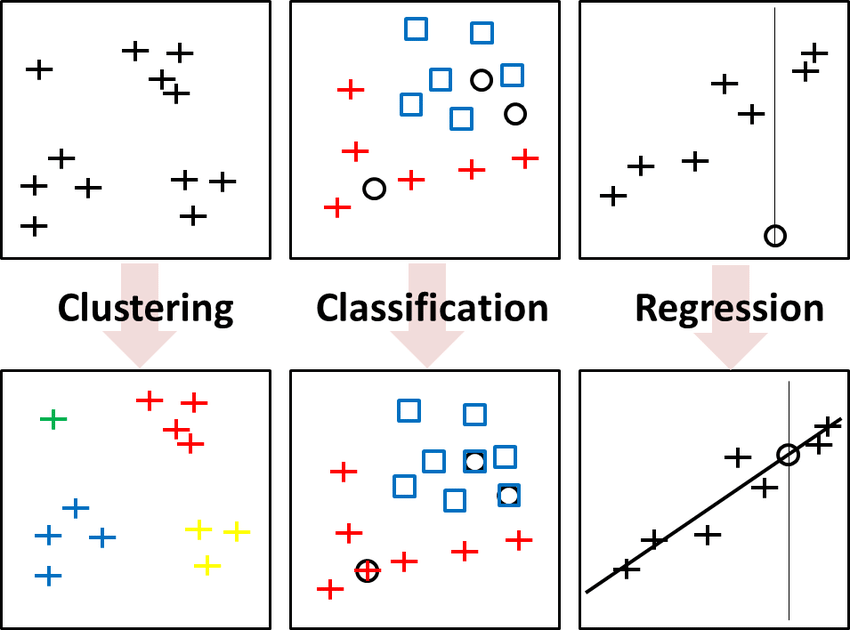

source (http://dx.doi.org/10.1007/978-3-319-21903-5_5)

## Applications
 - Identifying benign or malignant cells/tissues for cancer 
 - Business (price of housing, car insurance)
 - Recommendation: Amazon, Netflix, Youtube
 - Anomaly detection: Credit card fraud


## Machine Learning with Python 

## Thanks to a lot of different python libraries
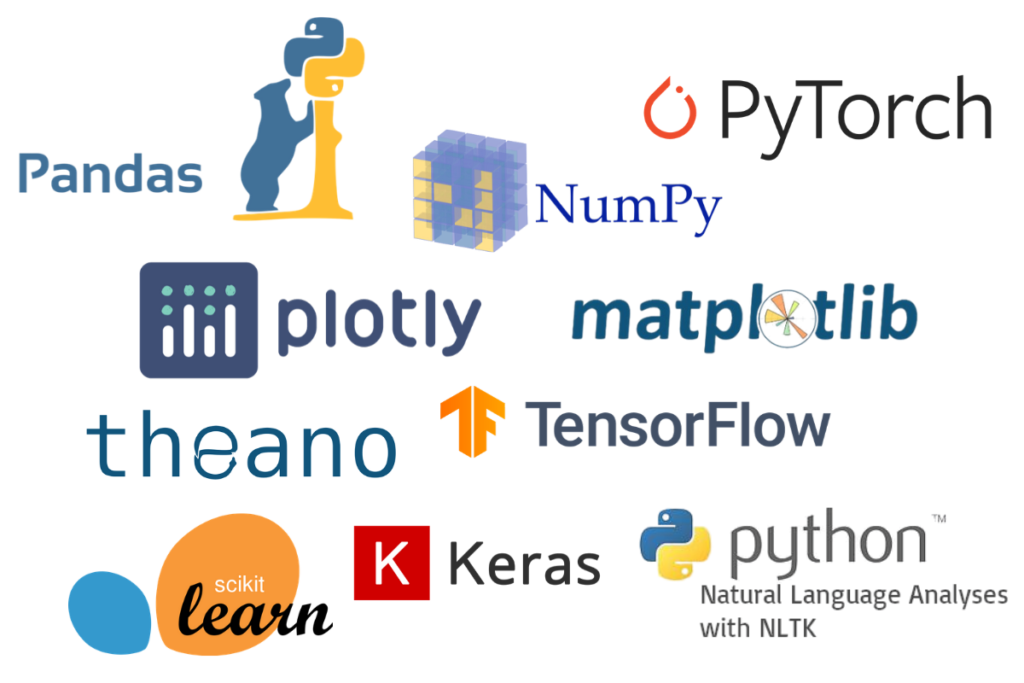

source (https://www.fireblazeaischool.in/blogs/wp-content/uploads/2020/06/Python-Libraries-1024x683.png)

## Our focus here is on Scikit-Learn
https://scikit-learn.org

### Why scikit-learn

 - #### Free 
 - #### Well-designed to work with:
- Numpy (https://numpy.org/)
- Scipy (https://scipy.org/)
 - #### Regression, Classification, and Clustering algorithms
 - #### Easy Implementation
 - #### Well documented

In [ ]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pickle

dataset source (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)
CO2 emission dataset
I have cleaned the original dataset 
Understanding the table															
Model	4WD/4X4 = Four-wheel drive														
	AWD = All-wheel drive														
	FFV = Flexible-fuel vehicle														
	SWB = Short wheelbase														
	LWB = Long wheelbase														
	EWB = Extended wheelbase														
Transmission	A = automatic														
	AM = automated manual														
	AS = automatic with select shift														
	AV = continuously variable														
	M = manual														
	3 – 10 = Number of gears														
Fuel type	X = regular gasoline														
	Z = premium gasoline														
	D = diesel														
	E = ethanol (E85)														
	N = natural gas														
Fuel consumption	City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)														
CO2 emissions	the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

In [ ]:
df=pd.read_csv('MY2021_canada_fuel_consumption.csv')
df_orig=df
print(df.columns)
print(df.dtypes)
df.head()


In [ ]:
# We can see how the features are related to the target
plt.scatter(df['CO2 Emissions'],df['Combined rate'])

We could define a function like below to use for making better quality plots

In [ ]:
def plot(x,y,xlabel,ylabel,color):
    plt.scatter(x,y,s=60,c=color,alpha=0.4)
    plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)
    #plt.axhline(y=0.0,color='purple',linestyle='--',linewidth=1.5)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.savefig(feature+'_vs_'+target+'.pdf',dpi=80)
    plt.show()
    plt.close()
    

In [ ]:
effect='CO2 Emissions'
cause='Combined rate' # try 'City rate', 'Hwy rate', 'Combined rate','premium_mpg'
#cause='Cylinders'
#cause='premium_mpg'
plot(df[cause],df[effect],cause,effect,'r')

Just looking at the features it looks like a linear regression problem (Just recall the equation for straight line, y = mx + c)

In [ ]:
df=df_orig[['Combined rate','CO2 Emissions']]
#df=df_orig[['Engine Size','CO2 Emissions']]
df.head()
data_set=df.to_numpy()
test_size=0.2 # 80 % train and 20 % test
x_tr, x_tt= train_test_split(data_set,test_size=test_size,shuffle=True)
print(np.shape(x_tr))
#x_train=x_tr[:,:1];y_train=x_tr[:,-1];x_test=x_tt[:,:1];y_test=x_tt[:,-1]
x_train=x_tr[:,:1];y_train=x_tr[:,1:2];x_test=x_tt[:,:1];y_test=x_tt[:,1:2]

print(np.shape(x_train),np.shape(y_train))
print(np.shape(x_test),np.shape(y_test))

#Training a linear model
clf=linear_model.LinearRegression()
clf.fit(x_train,y_train)
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

# getting mean asolute differences
train_mae=mean_absolute_error(y_train,pred_train)
test_mae=mean_absolute_error(y_test,pred_test)

print('Train MAE is %f and test MAE is %f '%(train_mae,test_mae))

In [ ]:
#Plotting 
plot(y_train,pred_train,'true_train','pred_train','b')
plot(y_test,pred_test,'true_test','pred_test','r')

In [ ]:
c=clf.intercept_
m=clf.coef_
print('Train slope is %f and the intercept is %f '%(m,c))

In [ ]:
y_hat=m*x_test+c
mean_absolute_error(y_hat,pred_test)

### Mean Absolute Error (MAE) is not the only metric to evaluate the performance
Link to various metrics in scikit-learn : https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
### Root mean squared error (Ideal score is zero, the less the better)
train_rmse=np.sqrt(mean_squared_error(y_train,pred_train))
test_rmse=np.sqrt(mean_squared_error(y_test,pred_test))
print('Train RMSE is %f and test RMSE is %f '%(train_rmse,test_rmse))

In [ ]:
### R- squared error (Ideal score is 1.0, closer to 1.0 the better)
train_r2=r2_score(y_train,pred_train)
test_r2=r2_score(y_test,pred_test)
print('Train R2-score is %f and test R2-score is %f '%(train_r2,test_r2))

In [ ]:
#### Saving and re-loading a model

In [ ]:
#save
clf_save_lin=pickle.dumps(clf)
#reload
#clf_reload_lin=pickle.loads(clf_save_lin)

In [ ]:
## Task : Building a linear model that can use two features

In [ ]:
## Non-linear regression

In [ ]:
def non_linear_model(x_train, y_train, nfold, nthread,in_alpha=np.logspace(-15, 5, 21, base=2), in_gamma=np.logspace(-15, 5, 21, base=2), kernel=None, rseed=None):
    if rseed:
        random.seed(rseed)
        np.random.seed(rseed)

    neg_root_mean_squared_error = make_scorer(mean_squared_error, greater_is_better=False)

    clf = GridSearchCV(KernelRidge(kernel=kernel), cv=nfold, n_jobs=nthread, verbose=1, scoring=neg_root_mean_squared_error, param_grid={"alpha":in_alpha, "gamma": in_gamma})

    clf.fit(x_train, y_train)

    return clf

In [ ]:
ker='laplacian';nfold=5;nthread=2;number = random.randint(1, 1000)
rseed = random.seed(number);test_size = 0.20;alphas=np.logspace(-15, 1, 19, base=2);gammas=np.logspace(-15, 1, 19, base=2)
clf=non_linear_model(x_train, y_train,nfold, nthread, in_alpha=alphas, in_gamma=gammas, kernel=ker, rseed=rseed)
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

In [ ]:
plot(y_train,pred_train,'true_train','pred_train','b')
plot(y_test,pred_test,'true_test','pred_test','r')

In [ ]:
train_mae=mean_absolute_error(y_train,pred_train)
test_mae=mean_absolute_error(y_test,pred_test)

print('Train MAE is %f and test MAE is %f '%(train_mae,test_mae))

train_rmse=np.sqrt(mean_squared_error(y_train,pred_train))
test_rmse=np.sqrt(mean_squared_error(y_test,pred_test))
print('Train RMSE is %f and test RMSE is %f '%(train_rmse,test_rmse))

### R- squared error (Ideal score is 1.0, closer to 1.0 the better)
train_r2=r2_score(y_train,pred_train)
test_r2=r2_score(y_test,pred_test)
print('Train R2-score is %f and test R2-score is %f '%(train_r2,test_r2))

In [ ]:
## Task 1: Could you rerun linear and non-linear model using more than one input features
## Task 2: 

## Classification

Description of the dataset

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Sample ID             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

In [ ]:
df_orig = pd.read_csv("cell_samples.csv")
df=df_orig
print(df.dtypes)
df.head()
print(df.shape)
## Two options : first to remove rows that are not integer
df = df_orig[pd.to_numeric(df_orig['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes
print(df.shape)
#df1=df.drop("BareNuc", axis='columns')
#print(df1.shape)
#print(df1.dtypes)
## second to remove only rows that have not int values


In [ ]:
def cell_class_plot(df,feat1,feat2):
    x_ax_mal=np.asarray(df[df['Class'] == 4][feat1])
    y_ax_mal=np.asarray(df[df['Class'] == 4][feat2])
    x_ax_ben=np.asarray(df[df['Class'] == 2][feat1])
    y_ax_ben=np.asarray(df[df['Class'] == 2][feat2])
    plt.scatter(x_ax_mal,y_ax_mal,s=60,c='r',alpha=0.5)
    plt.scatter(x_ax_ben,y_ax_ben,s=60,c='b',alpha=0.5)
    plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.2)
    plt.subplots_adjust(right=0.8)
    plt.xlabel(feat1,fontsize=14)
    plt.ylabel(feat2,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(['mal','ben'],fontsize=12,loc='center',bbox_to_anchor=(0.65, 0., 1.0, 1.0))
    plt.savefig(feat1+'_vs_'+feat2+'.pdf',dpi=80)
    plt.show()
    plt.close()


cell_class_plot(df,'SingEpiSize','MargAdh')


In [ ]:
# We want to make sure the class types are integers
df['Class']=df['Class'].astype('int')

In [ ]:
data_set=df.to_numpy()
print(np.shape(data_set))
test_size=0.2 # 80 % train and 20 % test
x_tr, x_tt= train_test_split(data_set,test_size=test_size,shuffle=True)
print(np.shape(x_tr))
#x_train=x_tr[:,:1];y_train=x_tr[:,-1];x_test=x_tt[:,:1];y_test=x_tt[:,-1]
x_train=x_tr[:,1:10];y_train=x_tr[:,10:11];x_test=x_tt[:,1:10];y_test=x_tt[:,10:11]
print(np.shape(x_train))
print(np.shape(y_train))

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

In [ ]:
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0,fontsize=14)
    plt.yticks(tick_marks, classes,fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True',fontsize=14)
    plt.xlabel('Predicted',fontsize=14)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred_test, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_test))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

## Understanding errors

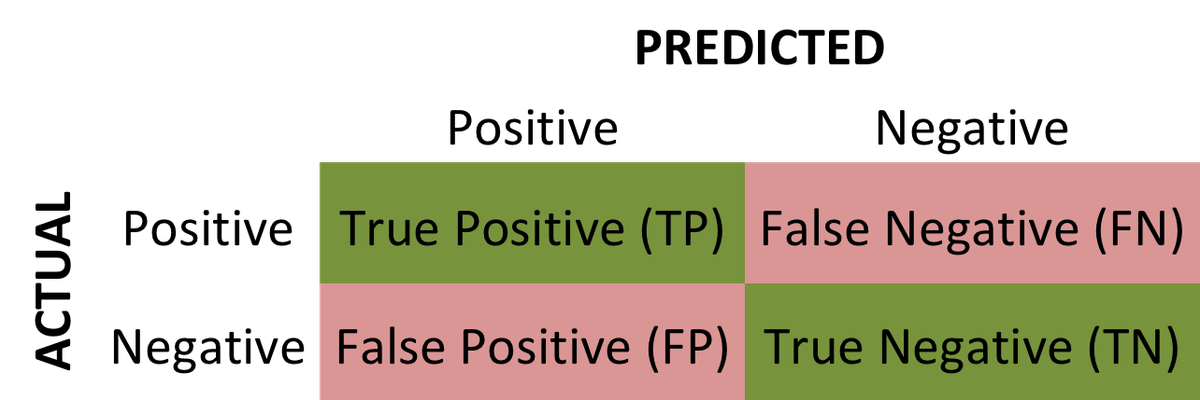


source (https://storage.googleapis.com/lds-media/images/Confusion_Matrix.width-1200.png)

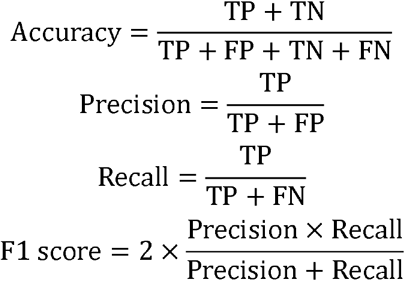


source (https://www.biorxiv.org/sites/default/files/highwire/biorxiv/early/2017/01/04/087445/embed/graphic-10.gif)